## Logistic Regression - Lesson 4

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data:

In [107]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('./data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [108]:
# Select the columns we want to use
columns_to_select = ['Item Size', 'Variety', 'Color','City Name']
pumpkins = full_pumpkins.loc[:, columns_to_select]

# Drop rows with missing values
pumpkins.dropna(inplace=True)

pumpkins.head()
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item Size  991 non-null    object
 1   Variety    991 non-null    object
 2   Color      991 non-null    object
 3   City Name  991 non-null    object
dtypes: object(4)
memory usage: 38.7+ KB


# Let's have a look to our data!

By visualising it with Seaborn

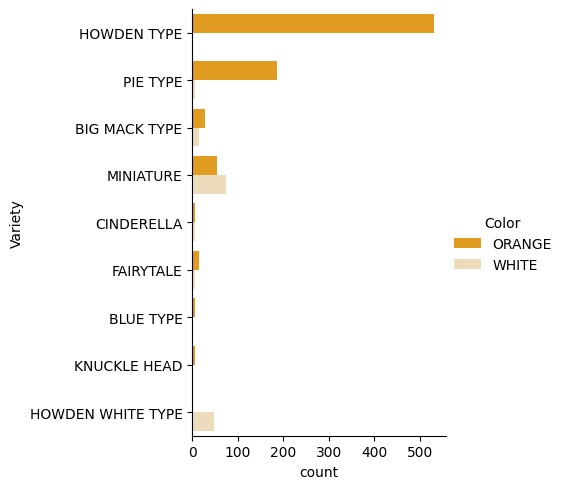

In [109]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}
# Plot a bar plot to visualize how many pumpkins of each variety are orange or white
sns.catplot(
    data=pumpkins, y="Variety", hue="Color", kind="count",
    palette=palette, 
)

# Data pre-processing

Let's encode features and labels to better plot the data and train the model

In [110]:
# Let's look at the different values of the 'Item Size' column
pumpkins['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [111]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Item Size' column using ordinal encoding
enc = OrdinalEncoder()
enc.fit(pumpkins[['Item Size']])
pumpkins[['Item Size']] = enc.transform(pumpkins[['Item Size']])

In [112]:
from sklearn.preprocessing import LabelEncoder
# Encode all the other features using one-hot encoding
categorical_features = ['City Name', 'Color', 'Variety']
pumpkins['City Name'] = LabelEncoder().fit_transform(pumpkins['City Name'])
pumpkins['Color'] = LabelEncoder().fit_transform(pumpkins['Color'])
pumpkins['Variety'] = LabelEncoder().fit_transform(pumpkins['Variety'])

In [113]:
pumpkins.head()

,Item Size,Variety,Color,City Name
2,3.0,4,0,1
3,3.0,4,0,1
4,2.0,4,0,1
5,2.0,4,0,1
6,3.0,4,0,1


# Analysing relationships between features and label

Let's now focus on a specific relationship: Item Size and Color!

In [114]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

<Axes: xlabel='Color', ylabel='Item Size'>

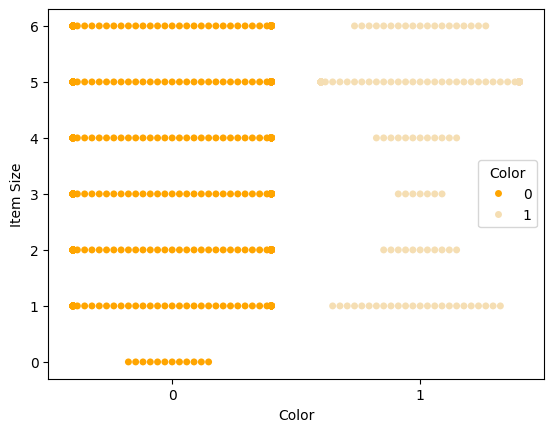

In [115]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
    0: 'orange',
    1: 'wheat'
}
sns.swarmplot(x="Color", y="Item Size", hue="Color", data=pumpkins, palette=palette)

**Watch out**: Ignoring warnings is NOT a best practice and should be avoid, whenever possible. Warnings often contain useful messages that let us improve our code and solve an issue.
The reason why we are ignoring this specific warning is to guarantee the readability of the plot. Plotting all the data points with a reduced marker size, while keeping consistency with the palette color, generates an unclear visualization.

# Build your model

In [116]:
from sklearn.model_selection import train_test_split
# X is the encoded features
X = pumpkins[pumpkins.columns.difference(['Color'])]
# y is the encoded label
y = pumpkins['Color']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [117]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the pumpkin dataset
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       269
           1       0.00      0.00      0.00        59

    accuracy                           0.82       328
   macro avg       0.41      0.50      0.45       328
weighted avg       0.67      0.82      0.74       328

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/Users/wangruiqi/Desktop/CV/ML-For-Beginners 3.36.13 PM/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wangruiqi/Desktop/CV/ML-For-Beginners 3.36.13 PM/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wangruiqi/Desktop/CV/ML-For-Beginners 3.36.13 PM/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[269,   0],
       [ 59,   0]])

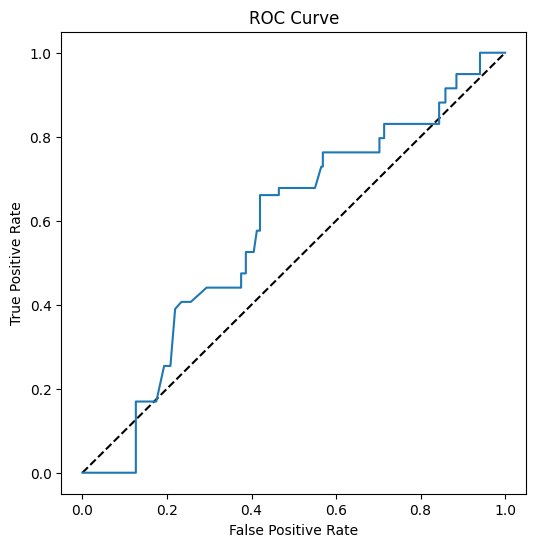

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [120]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.5786969945183038


In [121]:
import pickle
model_filename ='pumpkins-model.pkl'

pickle.dump(model, open(model_filename,'wb'))

model = pickle.load(open('pumpkins-model.pkl','rb'))
print(model.predict(X_test))
print(X_test.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
      City Name  Item Size  Variety
1056          4        5.0        7
1070          4        2.0        7
79            1        3.0        8
432           2        4.0        8
1151          9        6.0        4
